<div style="direction:rtl;line-height:300%;"><font face="XB Zar" size=5>
<div align=center>
   <br>
    <font face="Times New Roman" size=18>
    <p></p>
    In the name of God  
    </font>
    <br><br>
    <font face="Times New Roman" size=5 color=blue>
    Python for Data Mining<br>      </font>
    <font face="Times New Roman" size=4 color=blue> 
        Insurance Research Center
    </font>
    <br>
    <br>
    <font face="Times New Roman" size=4 color=#FF7500>
    Khayyam Salehi 
    </font>
    <br>       
    <font face="Times New Roman" size=3 color=#FF7500>
    Assistant Professor
    <br>
    Department of Computer science
    <br>
    Shahrekord University
    </font>
    <br>    <br>
</div>

<hr style="border:2px solid black"> </hr>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Regression

* Polynomial regression
    * PloynimialFeatures library of Scikit-Learn
    * Preprocessing step
    * Splitting into Train & Test sets
    * Creating a model (estimator)
    * Using the model
    * Choosing a model (adjusting the parameters)
    * Deploying
* Scaling data
* Cross validation    
* Regularization with SciKit-Learn

**How can we improve the linear regression models?**
* Using higher order relationships

**How can we consider non-linear relationships (e.g. $\log$)?**

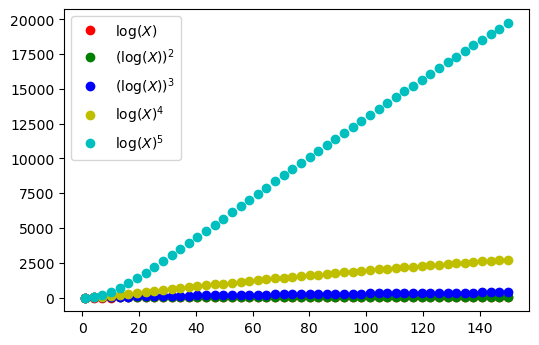

In [2]:
X = np.linspace(1,150,50)
plt.figure(dpi=100)
plt.plot(X, np.log2(X), 'ro', label = "$\log(X)$")
plt.plot(X, np.log2(X)**2, 'go', label = "$(\log(X))^2$")
plt.plot(X, np.log2(X)**3, 'bo', label = "$(\log(X))^3$")
plt.plot(X, np.log2(X)**4, 'yo', label = "$\log(X)^4$")
plt.plot(X, np.log2(X)**5, 'co', label = "$\log(X)^5$")

plt.legend()

**How can we handle the syncronization of features (i.e. a feature is only significant when in sync with another feature)?**

**How can we check that?**

## Ploynimial Regression

### PloynimialFeatures library of Scikit-Learn
* the bias
* the higher order of degree (e.g. $x_1^2$, $x_1^3$, $x_2^3$, ...) 
* the interaction between the features (e.g. $x_1x_2$, $x_1x_3$, ...) 
* converting features $A$ and $B$ to $A$, $B$, $A^2$, $AB$, $B^2$ with degree = 2.

### Framework:
1. Pre-processing step

`from sklearn.preprocessing import PolynomialFeatures`

2. Splitting into train and test sets:

`from sklearn.model_selection import train_test_split`<br>
`X_train, X_test, y_train, y_test = train_test_split(X, y)`

3. Importing model algorithms:

`from sklearn.model_family import ModelAlgorithm`<br>

4. Creating an instance of the model:

`mymodel = ModelAlgorithm(param_1, param_2, ...)`

5. Training the model:

`mymodel.fit(X_train, y_train)`

6. Predicting the $\hat{y}$:

`predictions = mymodel.predict(X_test)`

7. Importing error metrics

`from sklearn.metrics import error_metric`

8. Comparing with y_test:

`performance = error_metric(y_test, predictions)`

### Data

In [3]:
df = pd.read_csv("./data/Advertising.csv")
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.drop("Unnamed: 0", axis = 1, inplace=True)
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
X = df.drop('sales',axis=1)
y = df['sales']
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


### Preprocessing step

In [6]:
from sklearn.preprocessing import PolynomialFeatures

In [7]:
help(PolynomialFeatures)

Help on class PolynomialFeatures in module sklearn.preprocessing._data:

class PolynomialFeatures(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  PolynomialFeatures(degree=2, *, interaction_only=False, include_bias=True, order='C')
 |  
 |  Generate polynomial and interaction features.
 |  
 |  Generate a new feature matrix consisting of all polynomial combinations
 |  of the features with degree less than or equal to the specified degree.
 |  For example, if an input sample is two dimensional and of the form
 |  [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
 |  
 |  Parameters
 |  ----------
 |  degree : int, default=2
 |      The degree of the polynomial features.
 |  
 |  interaction_only : bool, default=False
 |      If true, only interaction features are produced: features that are
 |      products of at most ``degree`` *distinct* input features (so not
 |      ``x[1] ** 2``, ``x[0] * x[2] ** 3``, etc.).
 |  
 |  include_bias : bool, default=

In [8]:
poly_conv = PolynomialFeatures(degree = 2)

In [9]:
poly_conv.fit(X)

PolynomialFeatures()

In [10]:
poly_conv.transform(X)

array([[1.00000e+00, 2.30100e+02, 3.78000e+01, ..., 1.42884e+03,
        2.61576e+03, 4.78864e+03],
       [1.00000e+00, 4.45000e+01, 3.93000e+01, ..., 1.54449e+03,
        1.77243e+03, 2.03401e+03],
       [1.00000e+00, 1.72000e+01, 4.59000e+01, ..., 2.10681e+03,
        3.18087e+03, 4.80249e+03],
       ...,
       [1.00000e+00, 1.77000e+02, 9.30000e+00, ..., 8.64900e+01,
        5.95200e+01, 4.09600e+01],
       [1.00000e+00, 2.83600e+02, 4.20000e+01, ..., 1.76400e+03,
        2.78040e+03, 4.38244e+03],
       [1.00000e+00, 2.32100e+02, 8.60000e+00, ..., 7.39600e+01,
        7.48200e+01, 7.56900e+01]])

In [11]:
poly_conv.transform(X).shape

(200, 10)

In [12]:
X.shape

(200, 3)

In [13]:
# T, R, N

# 1, T, R, N
# T^2, TR, TN, R^2, RN, N^2

In [14]:
poly_features = poly_conv.transform(X)
poly_features

array([[1.00000e+00, 2.30100e+02, 3.78000e+01, ..., 1.42884e+03,
        2.61576e+03, 4.78864e+03],
       [1.00000e+00, 4.45000e+01, 3.93000e+01, ..., 1.54449e+03,
        1.77243e+03, 2.03401e+03],
       [1.00000e+00, 1.72000e+01, 4.59000e+01, ..., 2.10681e+03,
        3.18087e+03, 4.80249e+03],
       ...,
       [1.00000e+00, 1.77000e+02, 9.30000e+00, ..., 8.64900e+01,
        5.95200e+01, 4.09600e+01],
       [1.00000e+00, 2.83600e+02, 4.20000e+01, ..., 1.76400e+03,
        2.78040e+03, 4.38244e+03],
       [1.00000e+00, 2.32100e+02, 8.60000e+00, ..., 7.39600e+01,
        7.48200e+01, 7.56900e+01]])

In [15]:
X.iloc[2]

TV           17.2
radio        45.9
newspaper    69.3
Name: 2, dtype: float64

In [16]:
poly_features[2]

array([1.00000e+00, 1.72000e+01, 4.59000e+01, 6.93000e+01, 2.95840e+02,
       7.89480e+02, 1.19196e+03, 2.10681e+03, 3.18087e+03, 4.80249e+03])

In [17]:
17.2*45.9

789.4799999999999

In [18]:
69.3**2

4802.49

In [19]:
# fit and then transform in one statement
poly_features = poly_conv.fit_transform(X)
poly_features

array([[1.00000e+00, 2.30100e+02, 3.78000e+01, ..., 1.42884e+03,
        2.61576e+03, 4.78864e+03],
       [1.00000e+00, 4.45000e+01, 3.93000e+01, ..., 1.54449e+03,
        1.77243e+03, 2.03401e+03],
       [1.00000e+00, 1.72000e+01, 4.59000e+01, ..., 2.10681e+03,
        3.18087e+03, 4.80249e+03],
       ...,
       [1.00000e+00, 1.77000e+02, 9.30000e+00, ..., 8.64900e+01,
        5.95200e+01, 4.09600e+01],
       [1.00000e+00, 2.83600e+02, 4.20000e+01, ..., 1.76400e+03,
        2.78040e+03, 4.38244e+03],
       [1.00000e+00, 2.32100e+02, 8.60000e+00, ..., 7.39600e+01,
        7.48200e+01, 7.56900e+01]])

### Splitting into Train & Test sets

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# test_size is around 0.2 and 0.3
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=32)

In [22]:
X_train

array([[1.00000e+00, 2.18400e+02, 2.77000e+01, ..., 7.67290e+02,
        1.47918e+03, 2.85156e+03],
       [1.00000e+00, 6.61000e+01, 5.80000e+00, ..., 3.36400e+01,
        1.40360e+02, 5.85640e+02],
       [1.00000e+00, 2.20300e+02, 4.90000e+01, ..., 2.40100e+03,
        1.56800e+02, 1.02400e+01],
       ...,
       [1.00000e+00, 2.62700e+02, 2.88000e+01, ..., 8.29440e+02,
        4.57920e+02, 2.52810e+02],
       [1.00000e+00, 2.19800e+02, 3.35000e+01, ..., 1.12225e+03,
        1.51085e+03, 2.03401e+03],
       [1.00000e+00, 2.06900e+02, 8.40000e+00, ..., 7.05600e+01,
        2.21760e+02, 6.96960e+02]])

In [23]:
y_train

20     18.0
10      8.6
128    24.7
40     16.6
5       7.2
       ... 
190    10.8
124    19.7
54     20.2
133    19.6
43     12.9
Name: sales, Length: 140, dtype: float64

In [24]:
X_test.shape

(60, 10)

In [25]:
y_test

122    11.6
186    10.3
167    12.2
101    23.8
29     10.5
75      8.7
144    11.4
28     18.9
121     7.0
182     8.7
27     15.9
181    12.2
39     21.5
23     15.5
2       9.3
173    11.7
107     8.7
17     24.4
109    19.8
118    15.9
26     15.0
46     10.6
21     12.5
160    14.4
44      8.5
143    10.4
56      5.5
188    15.9
79     11.0
73     11.0
164    11.9
18     11.3
102    14.8
131    12.7
96     11.7
141    19.2
115    12.6
174    11.5
130     1.6
34      9.5
156    15.3
154    15.6
153    19.0
197    12.8
185    22.6
113    15.9
33     17.4
169    15.0
183    26.2
14     19.0
136     9.5
22      5.6
86     12.0
145    10.3
168    17.1
85     15.2
117     9.4
57     13.2
31     11.9
97     15.5
Name: sales, dtype: float64

### Creating a model (estimator)
#### Import a model class from a model family

In [26]:
from sklearn.linear_model import LinearRegression

#### Create an instance of the model with parameters

In [27]:
model = LinearRegression()

#### Fit or train the model on the training data

**Only fit to the training data**

In [28]:
model.fit(X_train,y_train)

LinearRegression()

### Using the model

#### Evaluation on the test set

In [29]:
test_predictions = model.predict(X_test)
test_predictions  

array([11.64354623, 10.46432041, 12.25833413, 23.06656322, 10.08944938,
        8.85743028, 11.14946928, 19.19407753,  7.55765681,  8.25551661,
       15.89992206, 12.44030847, 21.58679921, 15.74685459,  8.89007703,
       12.05799799,  8.85771029, 24.00659052, 19.33763682, 16.23366692,
       15.68873508, 10.18936926, 12.47961356, 14.62989058,  8.18341478,
       10.14209959,  6.9805444 , 15.51315294, 10.76959616, 10.88268144,
       11.87489891, 10.38837702, 14.16652568, 11.81220996, 11.69329254,
       19.46469017, 12.59604744, 11.90777286,  6.69480311,  9.07059342,
       15.03128679, 15.78964677, 19.3630632 , 12.72315311, 22.51925191,
       16.32146233, 17.35791747, 14.3686154 , 25.27865438, 19.30527667,
        8.89005855,  6.87722729, 11.62202097, 10.36418547, 17.26582018,
       15.35368116,  8.40438593, 13.48626639, 12.26858646, 15.68238389])

In [30]:
model.coef_

array([ 0.00000000e+00,  5.06631363e-02,  3.97268429e-02,  1.02754578e-02,
       -1.06491767e-04,  1.06473180e-03, -3.97031846e-05,  3.05916013e-05,
       -9.46944514e-05,  1.25535699e-06])

**How does the coefficients interpret?**

**What result can we infer around coefficients?**

#### Measuring the performance

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [32]:
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [33]:
MAE

0.4398382787964448

In [34]:
MSE

0.6539211723519339

In [35]:
RMSE

0.8086539261958319

In [36]:
MAE: 1.3654567890610607
MSE: 3.7495203698290354
RMSE: 1.936367829165997

### Choosing a model (adjusting the hyperparameters)

* Are we satisfied with this performance? (maybe a higher order)

* Be careful with overfitting:
    * low error on the training data
    * high error on the test data

<img src='./figs/under_over_fitting.png' width=700px/>

https://towardsdatascience.com/techniques-for-handling-underfitting-and-overfitting-in-machine-learning-348daa2380b9

**A loop:**
1. Iterate on different degree polynomial on X data
2. Test and split procedure
3. Train on the data
4. Report the metrics (RMSE) on *both* the train and test results
5. Plot the results and explore overfitting

In [37]:
# Error for training/testing per degree
train_RMSE_errors = []
test_RMSE_errors = []

for d in range(1,10):
    
    # Creating polynomial convertor, fitting, and transforming on X
    poly_conv = PolynomialFeatures(degree=d)
    poly_features = poly_conv.fit_transform(X)
    
    # Splitting for train/test
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3,\
                                                        random_state=32)
    
    # Training
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    # Predicting
    train_prediction = model.predict(X_train)
    test_prediction = model.predict(X_test)
       
    # Computing RMSE
    train_error = np.sqrt(mean_squared_error(y_train,train_prediction))
    test_error = np.sqrt(mean_squared_error(y_test,test_prediction))

    # Appending to lists for plotting
    train_RMSE_errors.append(train_error)
    test_RMSE_errors.append(test_error)

In [38]:
train_RMSE_errors

[1.55168522601041,
 0.5126004093747072,
 0.37593540364735467,
 0.306458339446716,
 0.2501209549562558,
 0.3753055033140395,
 0.21158027156977421,
 0.19056826371669286,
 0.2701212346334043]

In [39]:
test_RMSE_errors

[1.9363678291659963,
 0.8086539261958319,
 0.7078017248258577,
 0.6240018797737782,
 0.9054479891311892,
 2.5911910387332853,
 19.03756738809317,
 2024.1294722307632,
 61608.65214799625]

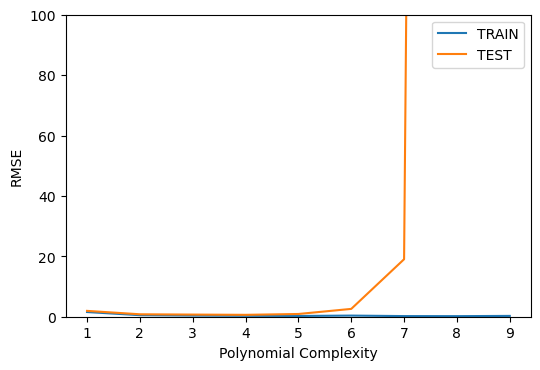

In [40]:
plt.figure(dpi=100)
plt.plot(range(1,10),train_RMSE_errors,label='TRAIN')
plt.plot(range(1,10),test_RMSE_errors,label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.ylim(0,100)
plt.legend()

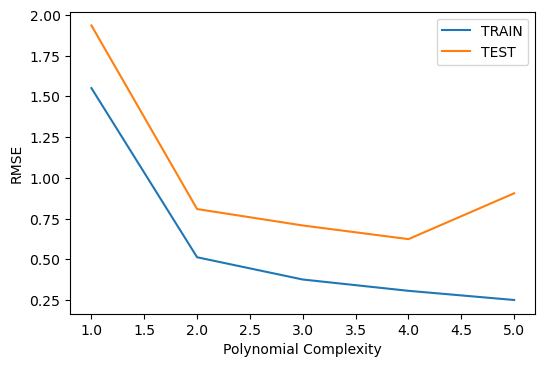

In [41]:
plt.figure(dpi=100)
plt.plot(range(1,6),train_RMSE_errors[:5],label='TRAIN')
plt.plot(range(1,6),test_RMSE_errors[:5],label='TEST')
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.legend()

### Deploying

* Two things to save
    * The polynomial converter
    * The model

In [42]:
final_poly_conv = PolynomialFeatures(degree=3)
final_model = LinearRegression()
final_model.fit(final_poly_conv.fit_transform(X),y)

LinearRegression()

#### Saving & loading

In [43]:
from joblib import dump, load

In [44]:
dump(final_poly_conv,'poly_converter.joblib')
dump(final_model, 'sales_poly_model.joblib') 

['sales_poly_model.joblib']

In [45]:
loaded_poly = load('poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

In [46]:
newdata = [[150,20,10]]

In [47]:
newdata_poly = loaded_poly.transform(newdata)
newdata_poly

array([[1.000e+00, 1.500e+02, 2.000e+01, 1.000e+01, 2.250e+04, 3.000e+03,
        1.500e+03, 4.000e+02, 2.000e+02, 1.000e+02, 3.375e+06, 4.500e+05,
        2.250e+05, 6.000e+04, 3.000e+04, 1.500e+04, 8.000e+03, 4.000e+03,
        2.000e+03, 1.000e+03]])

In [48]:
final_model.predict(newdata_poly)

array([14.27539463])

## Scaling the Data
* resulting faster convergence steepest descent algorithms
* avoiding updating some weights faster than others
* permitting comparison of coefficients

* Two types of scalling data
    * standardization $\Big($$\frac{X-\mu}{\sigma}$, thus $\mu_{rescale} = 0$ and $\sigma_{rescale} = 1$.$\Big)$
    * normalization $\Big($$\frac{X-X_{min}}{X_{max}-X_{min}}$. All values are between 0 and 1.$\Big)$

### Data

In [49]:
df = pd.read_csv("./data/Advertising.csv")
df.drop("Unnamed: 0", axis = 1, inplace=True)
X = df.drop('sales',axis=1)
y = df['sales']
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [50]:
# Creating polynomial convertor, fitting, and transforming on X
poly_conv = PolynomialFeatures(degree=3)
poly_features = poly_conv.fit_transform(X)

# Splitting for train/test
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3,\
                                                    random_state=32)
X_train.shape

(140, 20)

#### StandardScaler

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
help(StandardScaler)

Help on class StandardScaler in module sklearn.preprocessing._data:

class StandardScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  StandardScaler(*, copy=True, with_mean=True, with_std=True)
 |  
 |  Standardize features by removing the mean and scaling to unit variance
 |  
 |  The standard score of a sample `x` is calculated as:
 |  
 |      z = (x - u) / s
 |  
 |  where `u` is the mean of the training samples or zero if `with_mean=False`,
 |  and `s` is the standard deviation of the training samples or one if
 |  `with_std=False`.
 |  
 |  Centering and scaling happen independently on each feature by computing
 |  the relevant statistics on the samples in the training set. Mean and
 |  standard deviation are then stored to be used on later data using
 |  :meth:`transform`.
 |  
 |  Standardization of a dataset is a common requirement for many
 |  machine learning estimators: they might behave badly if the
 |  individual features do not more or less look like s

In [53]:
scaler = StandardScaler()

In [54]:
# fit method calculates the necessary statistics ($X_{min}$, $X_{max}$, $\mu$, ...)
# only fit on training data! (why?)
scaler.fit(X_train)

StandardScaler()

In [55]:
X_train = scaler.transform(X_train)
X_train.shape

(140, 20)

In [56]:
# be carefull!
X_test = scaler.transform(X_test)

In [57]:
# Training
model = LinearRegression()
model.fit(X_train,y_train)

# Predicting
test_prediction = model.predict(X_test)

# Computing RMSE
test_error = np.sqrt(mean_squared_error(y_test,test_prediction))
test_error

0.7078017248257696

In [58]:
model.coef_

array([ 0.00000000e+00,  7.42069111e+00,  1.05721536e+00,  7.51523801e-01,
       -9.79086028e+00,  4.01347785e+00, -1.56955509e+00, -7.17743894e-01,
       -8.12437425e-01,  2.46103108e-01,  4.43347181e+00, -5.91444480e-01,
        6.39106421e-01,  8.64958227e-03,  5.68082124e-01,  1.98314216e-01,
        4.73405159e-01,  1.94951402e-02,  8.07411469e-02, -2.13354128e-01])

## Cross validation

**How can we train and test with the entire data?**
* k-fold cross validation
* leave one out cross validation (high complexity)

<img src='./figs/10-fold-cross-validation.png' width=700px/>

**How can we tune the hyperparameters?**
* split into train and test set
* k-fold cross validation on train set

<img src='./figs/train-validation-test.png' width=700px/>

https://scikit-learn.org/stable/modules/cross_validation.html

## Regularization with SciKit-Learn

* minimizing te model complexity
* adding penalty to loss function (thus reducing the overfitting)

Three types of regularization methods:
1. L1 regularization (Lasso regression)
$$\frac{1}{2n}\sum_{i = 1}^n \Big(y_i - \sum_{j = 0}^m \beta_j x_{ij}\Big)^2 + \lambda \sum_{j = 1}^m |\beta_j| $$
2. L2 regularization (Ridge regression)
$$\frac{1}{2n}\sum_{i = 1}^n \Big(y_i - \sum_{j = 0}^m \beta_j x_{ij}\Big)^2 + \lambda \sum_{j = 1}^m \beta_j^2 $$
3. Mixing L1 and L2 (Elastic nets)
$$\frac{1}{2n}\sum_{i = 1}^n \Big(y_i - \sum_{j = 0}^m \beta_j x_{ij}\Big)^2 + \lambda\Big( \frac{1-\alpha}{2}\sum_{j = 1}^m \beta_j^2 + \alpha \sum_{j = 1}^m |\beta_j|\Big)$$